## Heart Attack Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('FIC.Full CSV.csv')
delrow=['Category','Age.Group(*)','Follow.Up','SK.React','num','CO','PLATELET_COUNT','Diagnosis','Others ','Family.History','Life.Style','Unnamed: 3','Diagnosis']
df=df.drop(columns=delrow,axis=1)
df=df.sort_values(by= 'Age')
df.head()


,Age,Gender,Marital status,Sleep,Depression,Hyperlipi,Smoking,F.History,Diabetes,HTN,...,restecg,thalach,exang,oldpeak,slope,ca,thal,SK,Reaction,Mortality
139,24,Female,MARRIED,NO,NO,YES,NO,0,1,YES,...,0,130,1,1.6,2,0,7,1,0,0
252,24,Male,MARRIED,YES,YES,YES,NO,0,0,NO,...,0,130,1,1.6,2,0,7,1,1,0
25,24,Male,MARRIED,YES,YES,YES,NO,0,0,NO,...,0,130,1,1.6,2,0,7,1,1,0
341,24,Male,MARRIED,YES,YES,YES,NO,0,0,NO,...,0,130,1,1.6,2,0,7,1,1,0
189,24,Male,MARRIED,YES,YES,YES,NO,0,0,NO,...,0,130,1,1.6,2,0,7,1,1,0


## Changing catagorical colums to numeric data type

In [3]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
categorical_columns = ['Marital status', 'Sleep', 'Depression', 'Hyperlipi', 'Smoking', 'F.History','Hypersensitivity','Gender','HTN','Allergies' ]
for colums in categorical_columns:
    df[colums]=label_encoder.fit_transform(df[colums])
df.head()

,Age,Gender,Marital status,Sleep,Depression,Hyperlipi,Smoking,F.History,Diabetes,HTN,...,restecg,thalach,exang,oldpeak,slope,ca,thal,SK,Reaction,Mortality
139,24,0,0,0,0,1,0,0,1,1,...,0,130,1,1.6,2,0,7,1,0,0
252,24,1,0,1,1,1,0,0,0,0,...,0,130,1,1.6,2,0,7,1,1,0
25,24,1,0,1,1,1,0,0,0,0,...,0,130,1,1.6,2,0,7,1,1,0
341,24,1,0,1,1,1,0,0,0,0,...,0,130,1,1.6,2,0,7,1,1,0
189,24,1,0,1,1,1,0,0,0,0,...,0,130,1,1.6,2,0,7,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 139 to 138
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               368 non-null    int64  
 1   Gender            368 non-null    int32  
 2   Marital status    368 non-null    int32  
 3   Sleep             368 non-null    int32  
 4   Depression        368 non-null    int32  
 5   Hyperlipi         368 non-null    int32  
 6   Smoking           368 non-null    int32  
 7   F.History         368 non-null    int64  
 8   Diabetes          368 non-null    int64  
 9   HTN               368 non-null    int32  
 10  Allergies         368 non-null    int32  
 11  BP                368 non-null    float64
 12  Thrombolysis      368 non-null    int64  
 13  BGR               368 non-null    int64  
 14  B.Urea            368 non-null    float64
 15  S.Cr              368 non-null    float64
 16  S.Sodium          368 non-null    int64  


In [5]:
df.describe()

,Age,Gender,Marital status,Sleep,Depression,Hyperlipi,Smoking,F.History,Diabetes,HTN,...,restecg,thalach,exang,oldpeak,slope,ca,thal,SK,Reaction,Mortality
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,...,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,54.293478,0.774457,0.008152,0.391304,0.953804,0.926630,0.529891,0.195652,0.461957,0.546196,...,1.073370,140.923913,0.562500,1.541848,1.842391,1.002717,5.858696,0.983696,0.747283,0.217391
std,8.718158,0.418509,0.090043,0.488707,0.210194,0.261097,0.499785,0.397242,0.499229,0.498539,...,0.994562,22.994601,0.496754,1.385381,0.564284,1.037442,1.744319,0.126816,0.435162,0.413033
min,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,50.750000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,125.000000,0.000000,0.275000,1.750000,0.000000,3.000000,1.000000,0.000000,0.000000
50%,55.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,2.000000,144.000000,1.000000,1.200000,2.000000,1.000000,7.000000,1.000000,1.000000,0.000000
75%,60.250000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,2.000000,158.000000,1.000000,2.200000,2.000000,2.000000,7.000000,1.000000,1.000000,0.000000
max,77.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,195.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Age  Gender  Marital status  Sleep  Depression  Hyperlipi  Smoking  \
139  False   False           False  False       False      False    False   
252  False   False           False  False       False      False    False   
25   False   False           False  False       False      False    False   
341  False   False           False  False       False      False    False   
189  False   False           False  False       False      False    False   
..     ...     ...             ...    ...         ...        ...      ...   
134  False   False           False  False       False      False    False   
135  False   False           False  False       False      False    False   
136  False   False           False  False       False      False    False   
137  False   False           False  False       False      False    False   
138  False   False           False  False       False      False    False   

     F.Histor

## Test and Train dataset

In [7]:
from sklearn.model_selection import train_test_split
X=df['Mortality']
Y=df.drop(columns='Mortality',axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(Y,X,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(294, 47)
(74, 47)
(294,)
(74,)


## Scalling the values

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [9]:
corelation_matrix=df.corr()
corelation_matrix['Mortality'].sort_values(ascending=False)

Mortality           1.000000
Diabetes            0.317722
HTN                 0.176053
chol                0.175142
LYMPHO              0.106187
M.C.H               0.095050
M.C.V               0.094364
EOSINO              0.087040
S.Cr                0.082850
M.C.H.C             0.082435
B.Urea              0.069328
SK                  0.067853
Sleep               0.063387
Depression          0.053219
MONOCYTE            0.046161
slope               0.030498
Hyperlipi           0.021971
thal                0.020061
P.C.V               0.016327
ESR                 0.015143
Hypersensitivity    0.014515
S.Chloride          0.011773
Hemoglobin          0.006626
S.Potassium         0.002179
restecg            -0.012401
S.Sodium           -0.021864
fbs                -0.024669
thalach            -0.039567
cp                 -0.040081
BP                 -0.041203
Marital status     -0.047782
Allergies          -0.053827
CK.MB              -0.059392
RBC                -0.078343
C.P.K         

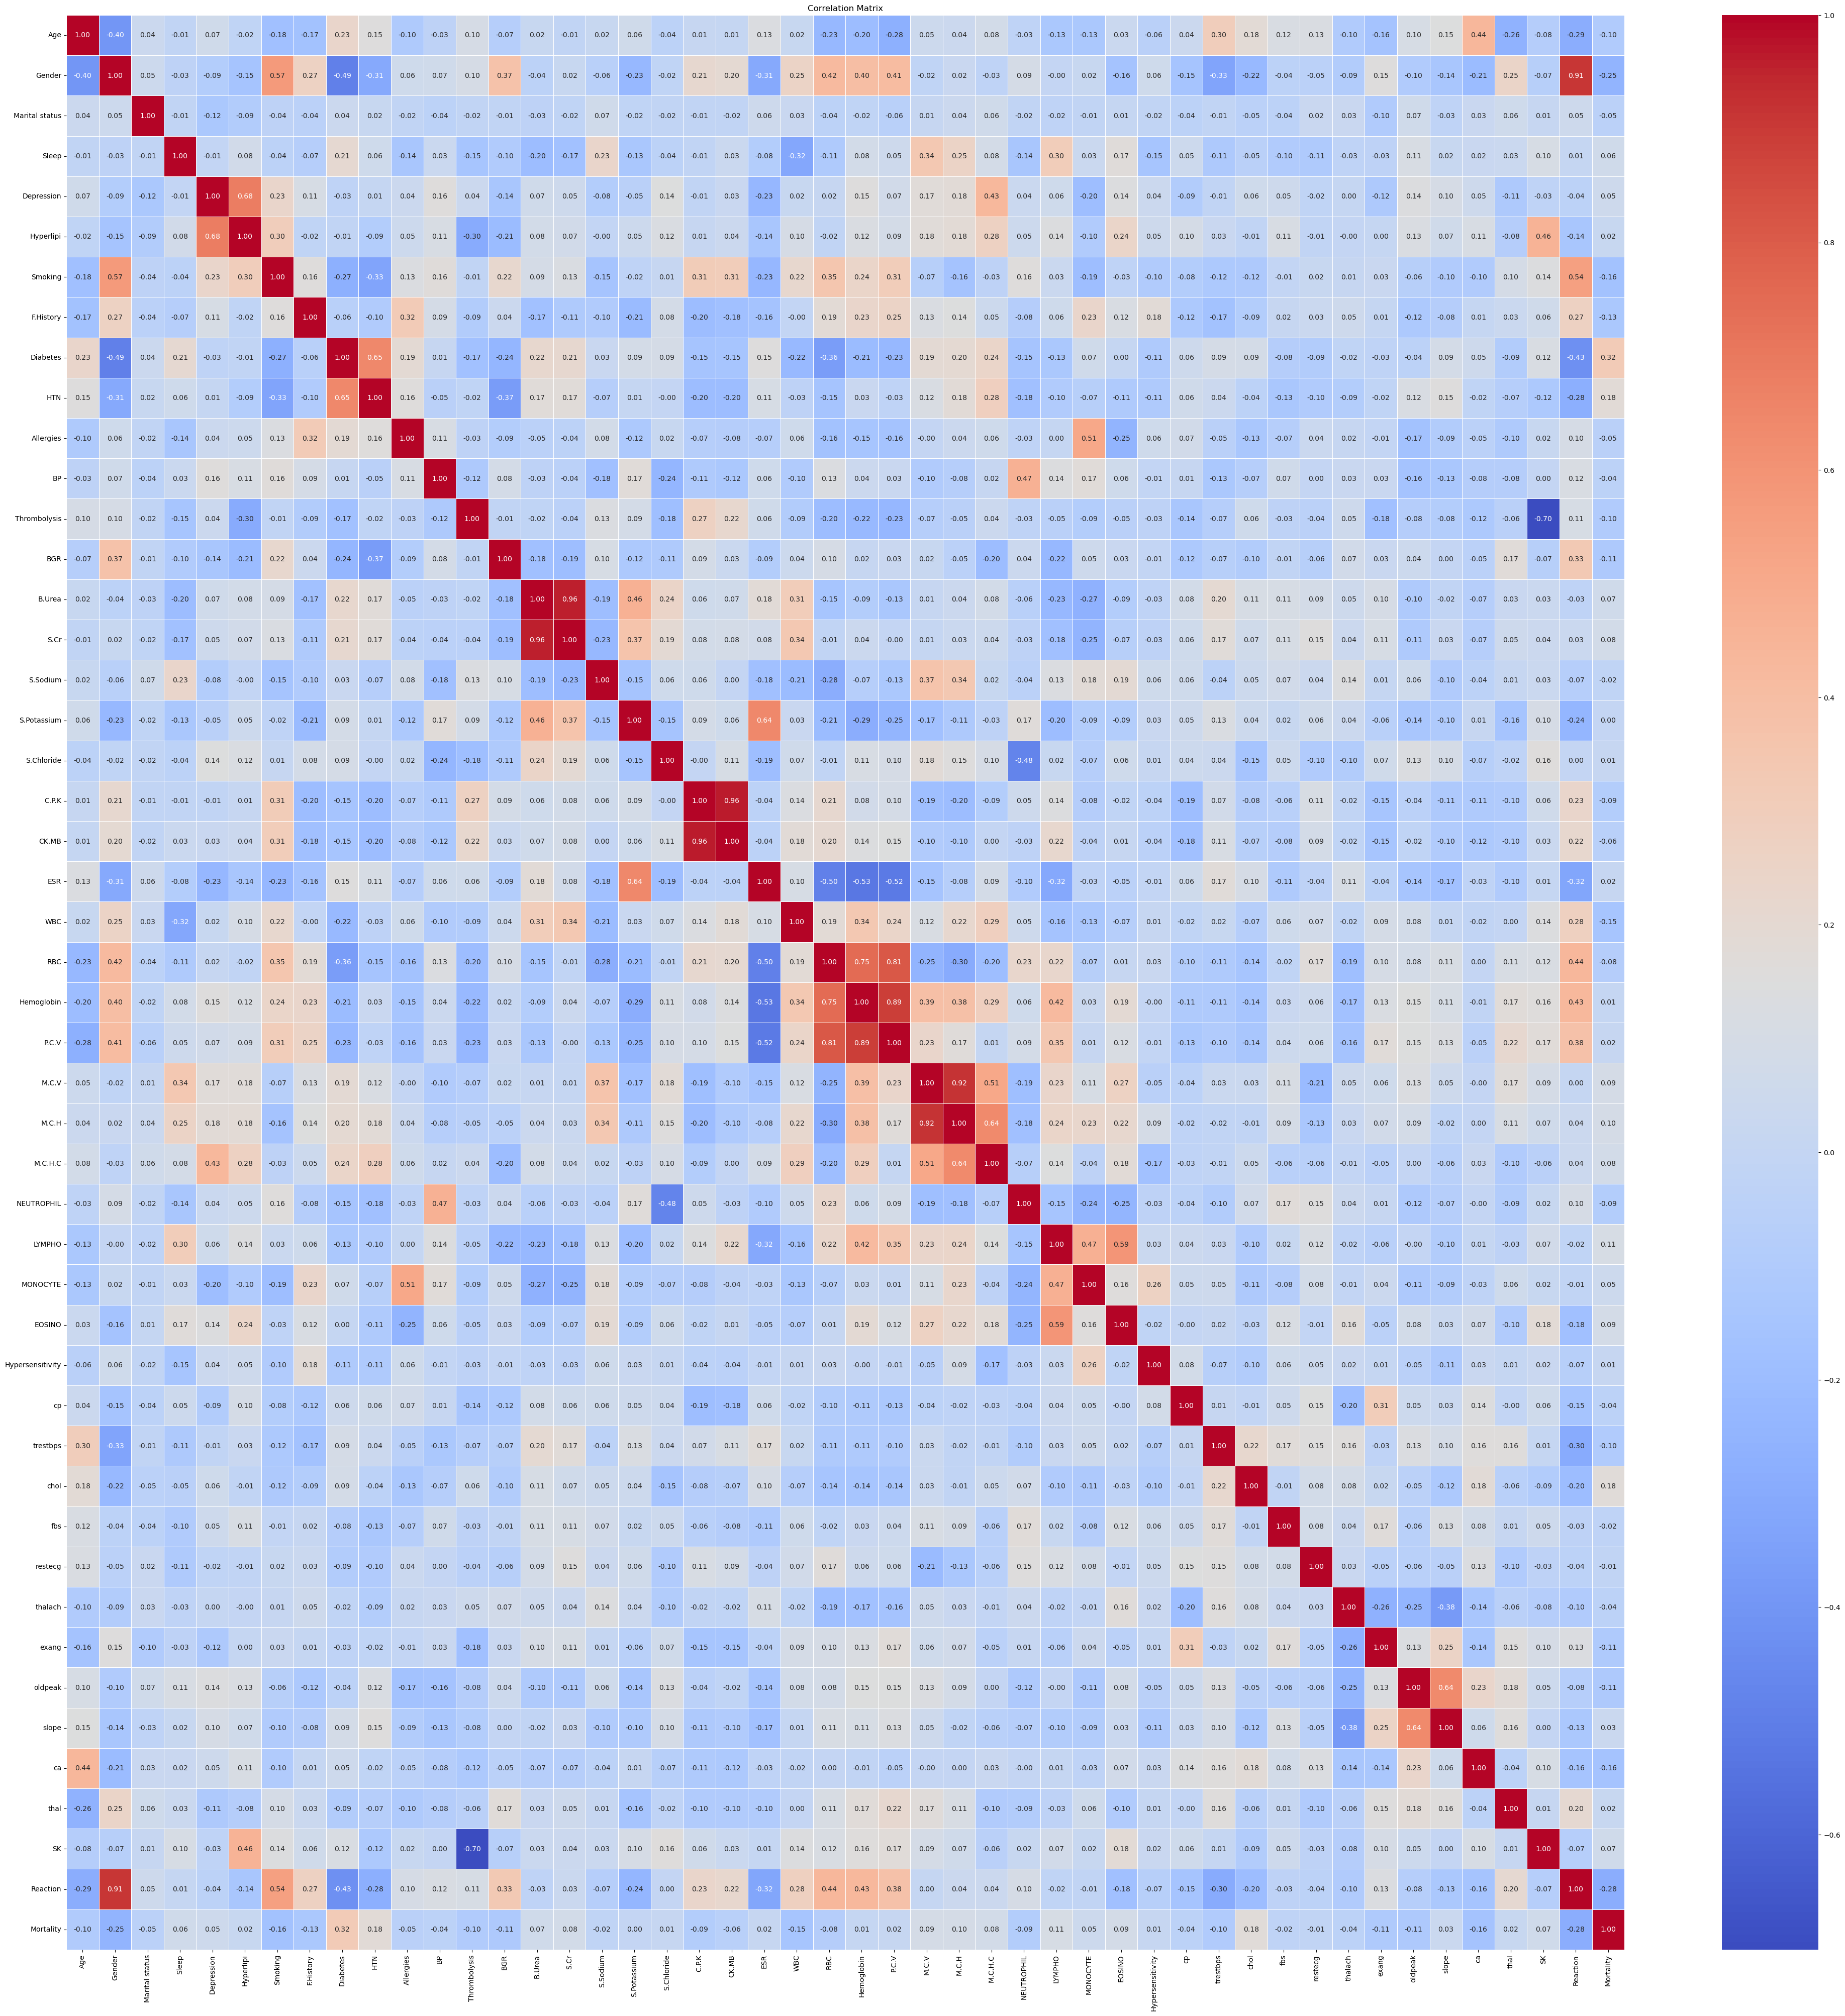

In [10]:
plt.figure(figsize=(50, 50))  
sns.heatmap(corelation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


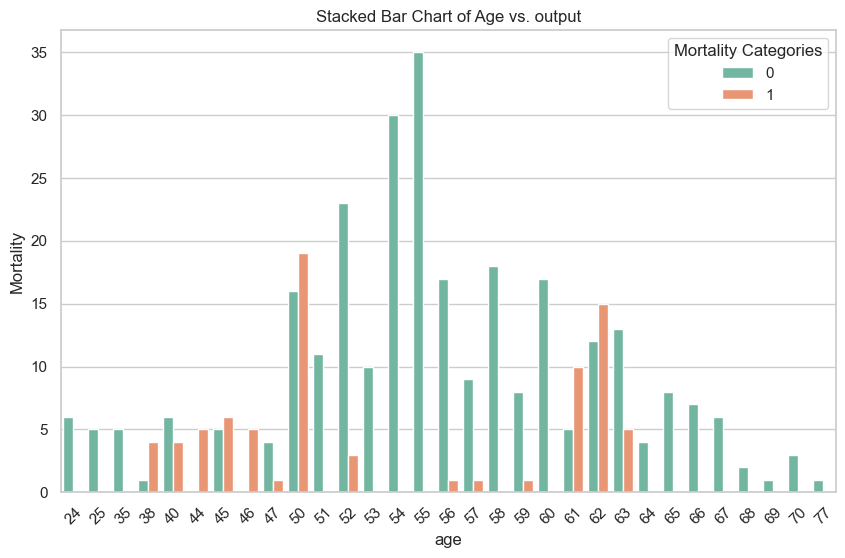

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(data=df, x='Age', hue='Mortality', palette='Set2')

plt.xlabel('age')
plt.ylabel('Mortality')
plt.title('Stacked Bar Chart of Age vs. output')
plt.xticks(rotation=45)

plt.legend(title='Mortality Categories')
plt.show()


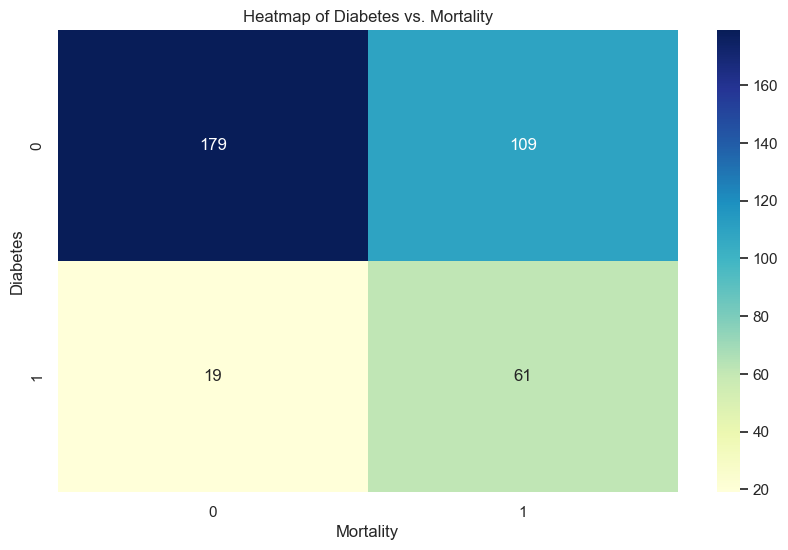

In [12]:

crosstab = pd.crosstab(df['Mortality'], df['Diabetes'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='d')

plt.xlabel('Mortality')
plt.ylabel('Diabetes')
plt.title('Heatmap of Diabetes vs. Mortality')
plt.show()


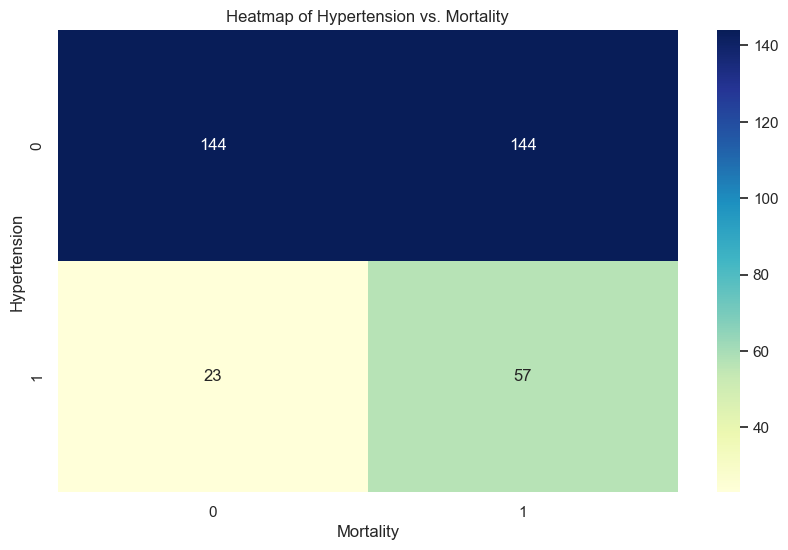

In [13]:

crosstab = pd.crosstab(df['Mortality'], df['HTN'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='d')

plt.xlabel('Mortality')
plt.ylabel('Hypertension')
plt.title('Heatmap of Hypertension vs. Mortality')
plt.show()

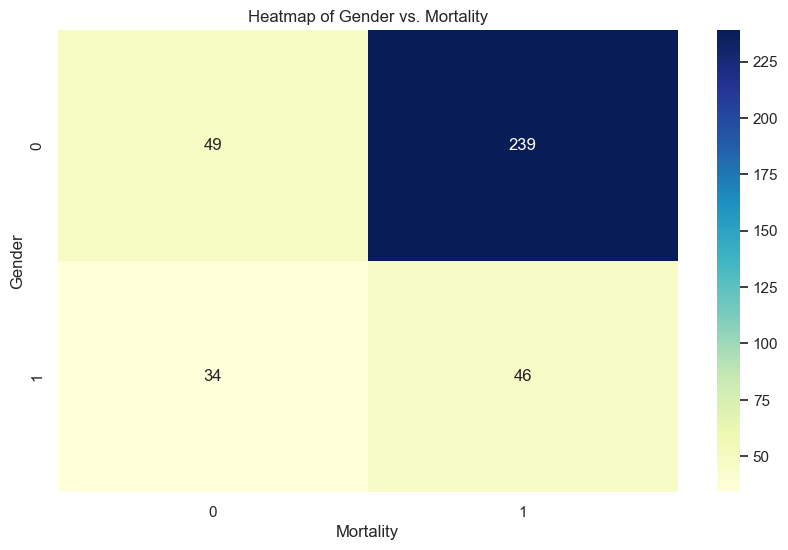

In [14]:
crosstab = pd.crosstab(df['Mortality'], df['Gender'])

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='d')

plt.xlabel('Mortality')
plt.ylabel('Gender')
plt.title('Heatmap of Gender vs. Mortality')
plt.show()

## ML models

In [15]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [16]:
prediction=model.predict(X_test)
accuracy=accuracy_score(prediction,Y_test)
print(accuracy)

0.9459459459459459


In [17]:
from joblib import dump,load
dump(model,'random')

['random']

In [18]:
r=load("random")

In [19]:
r


DecisionTreeClassifier()